# Importer les Bibliotiques :

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Lire la data :

In [2]:
df=pd.read_csv("mail_data.csv")

# Etape de Preprocessing :

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

Text(0, 0.5, 'COUNT')

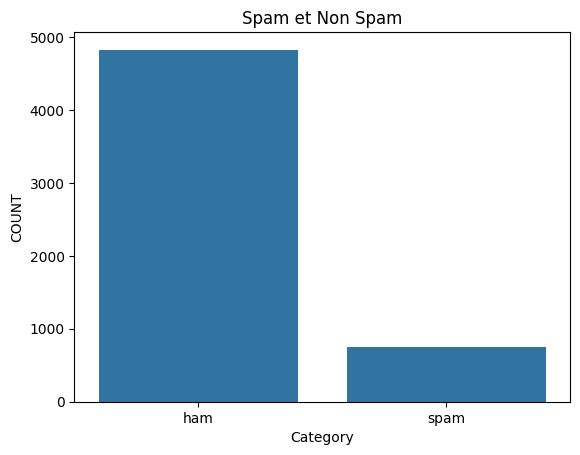

In [14]:
sns.countplot(x='Category',data=df)
plt.title("Spam et Non Spam")
plt.ylabel("COUNT")

In [22]:
# Donner une valeur pour les category : ham==>0 , spam==>1
df['Category'] = df['Category'].replace({'ham':0, 'spam':1})

In [21]:
df['Category'] = df['Category'].astype('int')

In [24]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# separer les donnes :
X=df['Message']
Y=df['Category']

In [26]:
# Train , test data:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

In [27]:
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

# Convertir les Messages en vecteurs :

In [31]:
extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_feature=extraction.fit_transform(X_train)
X_test_feature=extraction.transform(X_test)

In [35]:
print(X_train_feature)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34917 stored elements and shape (4457, 7407)>
  Coords	Values
  (0, 3716)	0.42055210468155463
  (0, 952)	0.5049232958014325
  (0, 3852)	0.41602941788835845
  (0, 3990)	0.28587662249818613
  (0, 4588)	0.45256051079680054
  (0, 3861)	0.3295018313041313
  (1, 6278)	0.5088818530813208
  (1, 1110)	0.589700054478067
  (1, 1951)	0.5152827490679127
  (1, 4949)	0.3574588002359157
  (2, 6618)	0.4163998874872886
  (2, 4039)	0.4687985483937011
  (2, 1276)	0.38553255703998024
  (2, 4717)	0.4882946069850712
  (2, 1221)	0.4687985483937011
  (3, 6835)	0.3766117352482065
  (3, 3212)	0.4856341711875206
  (3, 5513)	0.3575623530020194
  (3, 2120)	0.1993615507167269
  (3, 2130)	0.461717752254963
  (3, 6382)	0.288671553851558
  (3, 3256)	0.26962217160537083
  (3, 1314)	0.29243208491576556
  (4, 3990)	0.2160316436144507
  (4, 3318)	0.37093439507409803
  :	:
  (4453, 1564)	0.2927109791028318
  (4453, 1530)	0.3469289129133257
  (4453, 1938)	0.359379

# Entrainer le model : logistic Regression 

In [38]:
# Cree le model
model=LogisticRegression()

In [39]:
# entrainer pas la data d'entarinement
model.fit(X_train_feature,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Evaluer le model  :

In [40]:
train_prediction=model.predict(X_train_feature)

In [41]:
model_accuracy_train=accuracy_score(train_prediction,Y_train)

In [42]:
print("Accuracy de model Par les donne d'entrainement :",model_accuracy_train)

0.969710567646399


In [43]:
test_prediction=model.predict(X_test_feature)

In [46]:
model_accuracy_test=accuracy_score(Y_test,test_prediction)

In [47]:
print("Accuracy de model Par les donne de Test :",model_accuracy_test)

Accuracy de model Par les donne de Test : 0.9560538116591928


# Predire en utilisant le model :

In [55]:
mail=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

In [56]:
mail_feature=extraction.transform(mail)

In [57]:
result=model.predict(mail_feature)

In [58]:
print(result)

[0]


# Enregistrer les Models Pour UI

In [60]:
import pickle 
pickle.dump(model,open("spam_prediction.pkl","wb"))
pickle.dump(extraction,open("vertorize_model.pkl","wb"))